In [ ]:
# Data Source: https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset
# Folder: Online Retail Sales
# Description:
##This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.
##The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


# Analysis of Online retail sales dataset

## Overall goals:
- See the shape of the dataset and explore it
- Take a quick look at the data and decide on what to focus
- Manipulate data(changing data, creating new data, cleaning data etc...)
- Visualize findings to tell a story and back up analysis conducted
    - Visualizations include:
        - Geographical map
        - Bar Graphs, Histograms, Scatterplots etc...

## Libraries used throughout
- Pandas
- Folium
- NumPy
- Matplotlib

### In the case of errors
- Not all python libraries may be on your machine and or within your directory. Ensure to install them.
- You ran a cell with an edit that you made to it(This notebook is designed to run seamlessly with no edits)
- Not running a python kernel or you're using an old version of python kernel

In [49]:
#Libraries to be used
# pip install "name of library"(incase there is an error where the library)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium


In [2]:
#convert the excel file to csv to create the main DataFrame
online_retail = pd.read_excel('Online_Retail.xlsx')
online_retail.to_csv('Online_Retail.csv', index=False)
online_retail.shape

(541909, 8)

In [3]:
#Quick look of the DataFrame
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Attribute Information:
- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

### We will want to see what is unique about each of the qualitative columns
#### This will allow us to get an idea of distinction within the dataset where it matters

In [4]:
#utilizing NumPy to find the count of unique values in the description column
description = online_retail['Description'].unique().tolist() #tolist isnt necessary but for safety it stores the array of values to a list
print(type(description))
len(description)


<class 'list'>


4224

In [5]:
cust_id = online_retail['CustomerID'].unique().tolist() #tolist isnt necessary but for safety it stores the array of values to a list
print(type(cust_id))
len(cust_id)


<class 'list'>


4373

In [6]:
country = online_retail['Country'].unique().tolist() #tolist isnt necessary but for safety it stores the array of values to a list
print(type(country))
len(country)


<class 'list'>


38

### We want to see if there are any null values within the data and analyze them to see whether they should be deleted or changed, or a mix of both

In [7]:
online_retail[online_retail.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [8]:
#Interestingly 135080 rows/541909 rows have null values. There is a lot of cleaning to be done.
#Lets check what columns have null values
online_retail.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [9]:
#Here we can see that the focus is to be placed on the Description and CustomerID column.
#From this its possible to infer that maybe its orders that never went through or had errors. Lets check to see the counts of null values for each
online_retail['Description'].isnull().sum()


1454

In [10]:
#Same for customerID
online_retail['CustomerID'].isnull().sum()

135080

## Overall more customerID rows are null in comparison to description
### Additionally, I've noticed that there are rows of data where the unit price is listed as 0.
- This isn't null, but to me I view it as that. Therefore, I will clean this data to remove rows with these conditions.

In [11]:
#First find all the rows
cust_desc_errors = online_retail[online_retail['Description'].isnull() & online_retail['CustomerID'].isnull()]
cust_desc_errors


#new_online_retail = online_retail[online_retail[[cust_desc_errors & ]]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [91]:
#Now we delete those rows which is essentially the opposite of our previous operation but we change from using & and use the or condition
new_online_retail = online_retail[online_retail['Description'].notnull() | online_retail['CustomerID'].notnull()]
new_online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### We now have a slightly more cleaned up df which now has the issue with the null descriptions gone.
### We'll now sort the issue with the null customerID values. Note that its possible they may be guest purchases 

In [92]:
new_online_retail.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [93]:
#Going forward, I'm gonna conduct some tests on other columns to find places where there may be errors like a negative quantity and also remove them as well
new_online_retail = new_online_retail[new_online_retail['Quantity'] > 0]
new_online_retail.shape

(530693, 8)

In [94]:
#Next I'll check the unique values in each column that we arent sure of if there are valid values for
new_online_retail['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [95]:
#Quick check on the uncspecified country to see if anything is wrong from first glance
new_online_retail[new_online_retail['Country'].str.contains('Unspecified')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152712,549687,20685,DOORMAT RED RETROSPOT,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2011-04-11 13:29:00,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2011-04-11 13:29:00,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24,2011-11-24 14:55:00,1.25,NaN,Unspecified
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12,2011-11-24 14:55:00,1.25,NaN,Unspecified
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12,2011-11-24 14:55:00,1.65,NaN,Unspecified
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24,2011-11-24 14:55:00,0.55,NaN,Unspecified


In [96]:
#All the countries have no issues, however, there is EIRE which is actually Ireland and RSA which is actual South Africa.
#Therefore I will replace it in the df so it makes more sense to someone who checks the new df and any visualizations on countries
new_online_retail['Country'].replace({'EIRE': 'Ireland', 'RSA': 'South Africa'}, inplace=True) #inplace=True just modifies the df rather than creating a new one if it was false
new_online_retail

C:\Users\adwal\AppData\Local\Temp\ipykernel_35612\2137160141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_online_retail['Country'].replace({'EIRE': 'Ireland', 'RSA': 'South Africa'}, inplace=True) #inplace=True just modifies the df rather than creating a new one if it was false


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [97]:
#next I also want to check if there are any prices that are negative.
new_online_retail[new_online_retail['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [98]:
#We find that there is. And we do not want to keep this in our df.
#However we do want to keep it stored in a variable for future reference since it is a bad debt
bad_debt = new_online_retail['UnitPrice'] < 0
new_online_retail = new_online_retail.drop(new_online_retail[bad_debt].index)
new_online_retail.shape

(530691, 8)

### We have now cleaned up the dataset pretty well.
- Removed a few null values from various fields
- replaced the values of some fields to be more understandable to any audience
- Got rid of rows where the values didn't logically make sense

In [99]:
#Again lets check what else has null values
new_online_retail.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [100]:
#How much more of these values are null?
new_online_retail[new_online_retail['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [105]:
import re  # library for regular expressions

# Find all unique stock codes
unique_stock_code = new_online_retail['StockCode'].drop_duplicates()

# Define the regular expression pattern
pattern = r'^[a-zA-Z\s]*$'

# Find stock codes with only words or letters
matching_vals = new_online_retail[new_online_retail['StockCode'].str.match(pattern, na=False)]
string_stock_codes = matching_vals['StockCode'].unique().tolist()
string_stock_codes

['POST',
 'DOT',
 'M',
 'BANK CHARGES',
 'AMAZONFEE',
 'm',
 'DCGSSBOY',
 'DCGSSGIRL',
 'S',
 'PADS',
 'B']

In [124]:
# Let's analyze these further.
result_df = pd.DataFrame()  # Initialize an empty DataFrame to store results

for stock_code in string_stock_codes:
    subset_row = new_online_retail[new_online_retail['StockCode'] == stock_code].head(1)[['StockCode', 'Description']]
    result_df = pd.concat([result_df, subset_row], ignore_index=True)

# Display the result
result_df

,StockCode,Description
0,POST,POSTAGE
1,DOT,DOTCOM POSTAGE
2,M,Manual
3,BANK CHARGES,Bank Charges
4,AMAZONFEE,AMAZON FEE
5,m,Manual
6,DCGSSBOY,BOYS PARTY BAG
7,DCGSSGIRL,GIRLS PARTY BAG
8,S,SAMPLES
9,PADS,PADS TO MATCH ALL CUSHIONS


In [134]:
del M_stock_codes

In [136]:
#Everything above looks fine except for the stockcodes of m and M
M_stock_codes = pd.DataFrame()

M_stock_codes = new_online_retail[new_online_retail['StockCode'] == 'M'].head(10)
M_stock_codes = pd.concat([M_stock_codes,new_online_retail[new_online_retail['StockCode'] == 'm'].head(10)],ignore_index=True)
M_stock_codes.head(20)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
1,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
2,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
3,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
4,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
5,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom
6,537140,M,Manual,1,2010-12-05 12:53:00,0.42,12748.0,United Kingdom
7,537140,M,Manual,1,2010-12-05 12:53:00,0.85,12748.0,United Kingdom
8,537199,M,Manual,1,2010-12-05 14:06:00,0.65,15894.0,United Kingdom
9,537208,M,Manual,4,2010-12-05 15:12:00,0.85,15889.0,United Kingdom


In [139]:
#From this we were able to see two things, and it is that the little m was probably an error in the dataset
#That will get replaced as capital M.
#Also luckily there was only one occurence of this error
new_online_retail['StockCode'].replace('m','M', inplace=True)
M_stock_codes['StockCode'].replace('m','M', inplace=True)
M_stock_codes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
1,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
2,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
3,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
4,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
5,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom
6,537140,M,Manual,1,2010-12-05 12:53:00,0.42,12748.0,United Kingdom
7,537140,M,Manual,1,2010-12-05 12:53:00,0.85,12748.0,United Kingdom
8,537199,M,Manual,1,2010-12-05 14:06:00,0.65,15894.0,United Kingdom
9,537208,M,Manual,4,2010-12-05 15:12:00,0.85,15889.0,United Kingdom


## We have now cleaned up the dataset very well. And will now move on to analysis that we'll conduct on the countries of the dataset
### Some things to notice or consider are the following:
- The CustomerID column still contains null values, however there isn't anything that more we can do with it
    - The null values may just be guest purchases. Additionally, they are about 10,000 rows worth of data so it is not worth deleting
- We will first do some analysis on the US and then create a few visualizations to display findings
- We will also create a geographical map that showcases some densities in relation to where customers are from

### First is analysis of Sales in the US

#### We will start with creating a new df with only sales from customers in the US.

In [140]:
#Lets check the unique countries within the new online retail sales df
new_online_retail['Country'].unique()


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'South Africa'], dtype=object)

In [141]:
#From the array, above we see US customers are listed as "USA"
#Now we create the new df
us_customers = new_online_retail[new_online_retail['Country'] == 'USA']
print(f"All transactions: {len(new_online_retail)} vs transactions from US customers: {len(us_customers)}")

All transactions: 530691 vs transactions from US customers: 179


In [146]:
#So we can see that the US is a very small percentage of this retail store's us_customers
#From this, the owners of the retail store want to focus see two things below.
#What items are bought the most and how much money is spent on these items
#Lets look at the new df
us_customers.head(20)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
164464,550644,22722,SET OF 6 SPICE TINS PANTRY DESIGN,7,2011-04-19 16:19:00,3.95,12733.0,USA
164465,550644,22979,PANTRY WASHING UP BRUSH,2,2011-04-19 16:19:00,1.45,12733.0,USA
164466,550644,84987,SET OF 36 TEATIME PAPER DOILIES,3,2011-04-19 16:19:00,1.45,12733.0,USA
164467,550644,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1,2011-04-19 16:19:00,4.95,12733.0,USA
164468,550644,22993,SET OF 4 PANTRY JELLY MOULDS,1,2011-04-19 16:19:00,1.25,12733.0,USA
164469,550644,47580,TEA TIME DES TEA COSY,3,2011-04-19 16:19:00,2.55,12733.0,USA
164470,550644,22989,SET 2 PANTRY DESIGN TEA TOWELS,6,2011-04-19 16:19:00,3.25,12733.0,USA
164471,550644,22900,SET 2 TEA TOWELS I LOVE LONDON,3,2011-04-19 16:19:00,3.25,12733.0,USA
164472,550644,22128,PARTY CONES CANDY ASSORTED,12,2011-04-19 16:19:00,1.25,12733.0,USA
164473,550644,47590B,PINK HAPPY BIRTHDAY BUNTING,4,2011-04-19 16:19:00,5.45,12733.0,USA


In [149]:
#Create a new column for the total money spent on an item

us_customers.insert(6,'Total spent',us_customers['Quantity'] * us_customers['UnitPrice'])
us_customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Total spent,CustomerID,Country
164464,550644,22722,SET OF 6 SPICE TINS PANTRY DESIGN,7,2011-04-19 16:19:00,3.95,27.65,12733.0,USA
164465,550644,22979,PANTRY WASHING UP BRUSH,2,2011-04-19 16:19:00,1.45,2.90,12733.0,USA
164466,550644,84987,SET OF 36 TEATIME PAPER DOILIES,3,2011-04-19 16:19:00,1.45,4.35,12733.0,USA
164467,550644,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1,2011-04-19 16:19:00,4.95,4.95,12733.0,USA
164468,550644,22993,SET OF 4 PANTRY JELLY MOULDS,1,2011-04-19 16:19:00,1.25,1.25,12733.0,USA


In [150]:
us_customers['InvoiceNo'].unique()

array([550644, 570467, 572215, 580158, 580553], dtype=object)

In [151]:
#Next we make a new df that will have the total price per order
us_invoice = us_customers[['InvoiceNo','Total spent', 'Country']].groupby(['InvoiceNo','Country']).agg({'Total spent': 'sum'}).reset_index()
us_invoice


,InvoiceNo,Country,Total spent
0,550644,USA,383.95
1,570467,USA,1579.51
2,572215,USA,731.69
3,580158,USA,269.96
4,580553,USA,615.28


In [154]:
#list to hold all the values for the x-axis
i=0
X = []
while i < 5:
    X.append(f"US order #{i+1}")
    i += 1

#Y values
Y = us_invoice['Total spent'].tolist()
Y


[383.95, 1579.51, 731.6899999999999, 269.96, 615.28]

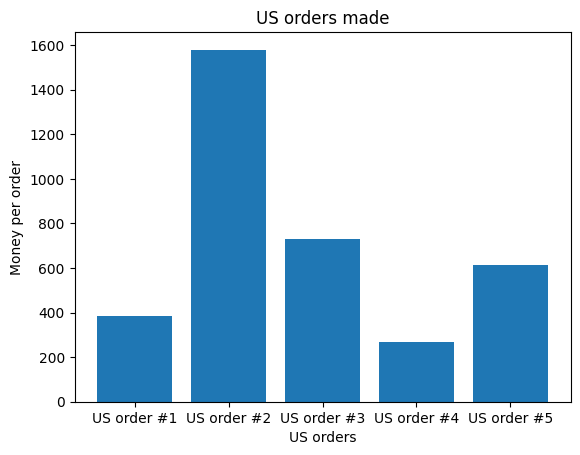

In [155]:
plt.bar(X,Y)
plt.xlabel("US orders")
plt.ylabel("Money per order")
plt.title("US orders made")

plt.show()

In [145]:
#How many different items were purchased
unique_us_items = us_customers['StockCode'].unique().tolist()
len(unique_us_items)

163